# Handwritten Digit Recognition in Python using Convolutional Neural Networks with Keras 

In this notebook, we will explore :
- load and use the MNIST Dataset in keras
- Develop and evaluate a base model
- Develop and evaluate a convolutional neral network for this dataset

C:\Users\pushkar\Anaconda3\anaconda_\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


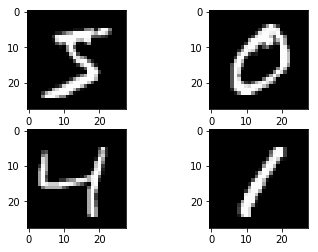

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

(X_train,y_train),(X_test,y_test) = mnist.load_data()
for i in range(4):
    
    plt.subplot(221+ i)
    plt.imshow(X_train[i],cmap =plt.get_cmap('gray'))
plt.show()
    


We can clearly see the digits in above figure. Now we move to make a baseline model to check the accuracy and error rate.Further, we'll compare it's efficiency to CNN model .

## Baseline  Model 

In [2]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

let's initialise random seed for reproducibility

In [3]:
seed =7
np.random.seed(seed)

For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.We'll do this using reshape() function of numpy

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
# flatten  28*28 image to a 784 vector
num_pix = X_train.shape[1]* X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pix).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pix).astype('float32')


Now, since the image has been converted to 784 length vector and since it's a gray scale image having range 0-255 , therefore it is always better to do some scaling.

In [6]:
#normalization
X_train = X_train/255
X_test = X_test/255


we know that our labels include letters from 0-9, therefore it's better to convert it into one - hot encoding vector for this multiclass classification problem. We can do it using to_categorical() function

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)
num_classes = y_test.shape[1]

(10000, 10)


we create and compile a baseline model . We'll further change the layer, lengths and model type to improve the accuracy.

In [8]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pix, input_dim=num_pix, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

We have created a simple model for baseline with a hidden layer with 784 neurons as input.For hidden layer, we have used ReLU(rectified linear unit) activation function.For output layer, we have used softmax activation function.
For compiling , we have used categorical cross entropy loss function, adam optimizer and accuracy metric.


We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.2786 - acc: 0.9211 - val_loss: 0.1412 - val_acc: 0.9573
Epoch 2/10
 - 10s - loss: 0.1117 - acc: 0.9678 - val_loss: 0.0926 - val_acc: 0.9711
Epoch 3/10
 - 10s - loss: 0.0720 - acc: 0.9794 - val_loss: 0.0779 - val_acc: 0.9769
Epoch 4/10
 - 10s - loss: 0.0504 - acc: 0.9856 - val_loss: 0.0744 - val_acc: 0.9768
Epoch 5/10
 - 10s - loss: 0.0373 - acc: 0.9894 - val_loss: 0.0685 - val_acc: 0.9783
Epoch 6/10
 - 10s - loss: 0.0268 - acc: 0.9928 - val_loss: 0.0

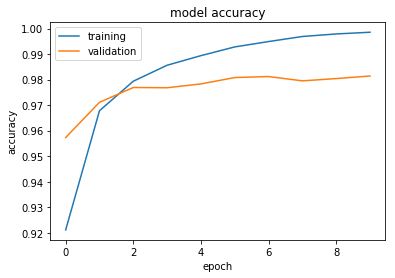

Test loss: 0.0601
Test accuracy: 0.981


In [9]:
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Thus, we are getting a test loss of 0.0601

## Convolutional Neural Network Model 

we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

In [10]:
#import classes 
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [11]:
seed =7
np.random.seed(seed)


The Convolution2D layers in Keras however, are designed to work with 3 dimensions per example. They have 4-dimensional inputs and outputs.So,we reshape the data.

In [12]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')

Now, we normalise the input between 0 to 1 and tranform output into one hot encoded vectors

In [13]:
X_train = X_train/255
X_test = X_test/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

layers of CNN :

- The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].

- Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
- The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
- Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
- Next a fully connected layer with 128 neurons and rectifier activation function.
- Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [19]:
def CNN1():
    model = Sequential()
    model.add(Conv2D(32, (5, 5),data_format='channels_first', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 12, 24)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 12, 24)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________
Trai

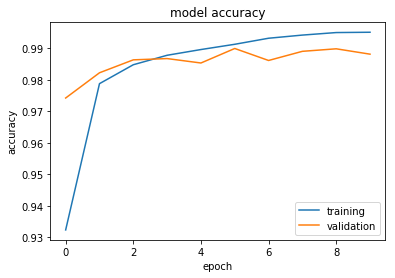

Test loss: 0.0371
Test accuracy: 0.988


In [20]:
model = CNN1()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [25]:
print(f'Test loss: {loss:.5}')
print(f'Test accuracy: {accuracy:.5}')

Test loss: 0.038493
Test accuracy: 0.9879


we can see here that final CNN error is 1.19%

So, we have implemented a small CNN model. Now, we will try to implement a larger model 

- Convolutional layer with 30 feature maps of size 5×5.
- Pooling layer taking the max over 2*2 patches.
- Convolutional layer with 15 feature maps of size 3×3.
- Pooling layer taking the max over 2*2 patches.
- Dropout layer with a probability of 20%.
- Flatten layer.
- Fully connected layer with 128 neurons and rectifier activation.
- Fully connected layer with 50 neurons and rectifier activation.
- Output layer.


In [21]:
def CNN2():
    model = Sequential()
    model.add(Conv2D(30, (5, 5),data_format='channels_first', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 12, 24)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 10, 15)        3255      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 5, 15)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 450)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               57728     
__________

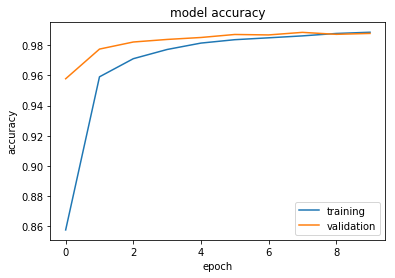

Test loss: 0.0385
Test accuracy: 0.988


In [22]:
model = CNN2()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [23]:
print(f'Test loss: {loss:.5}')
print(f'Test accuracy: {accuracy:.5}')

Test loss: 0.038493
Test accuracy: 0.9879


In this case also, accuracy is almost same as the previous case, when we had a simple CNN model. But now, one thind we can observe by comparing the plots that in case of simple CNN model, training accuracy was much high and it was higher than validation accuracy, so there may be a case of overfitting but in this case we can see that training and validation accuracy are almost same at last, so probably there is no overfitting.

We can increase the accuracy further more by playing with the layers and it's units.